**Problem Statement**:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation


![Kyphosis](https://www.mdpi.com/applsci/applsci-09-03322/article_deploy/html/images/applsci-09-03322-g002-550.jpg)
**(a)** A normal spine (without kyphosis); **(b)** Patient with abnormal spine (kyphosis).

In [1]:
#importing lib:
import pandas as pd
import numpy as np
import seaborn as sns
#reading data:
df=pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [2]:
df.shape

(81, 4)

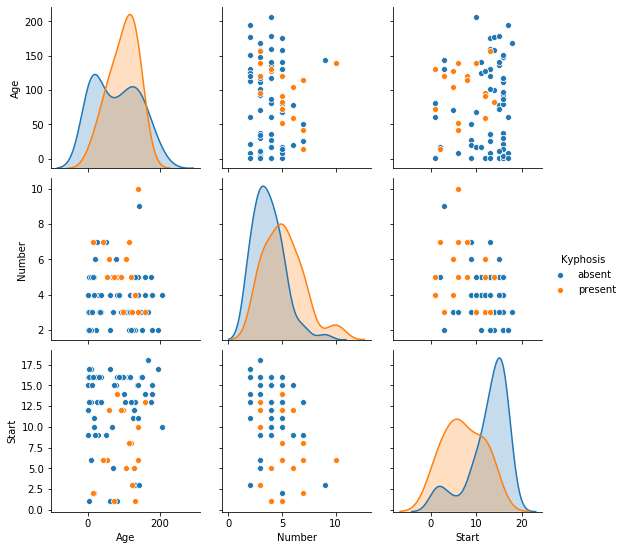

In [3]:
sns.pairplot(data=df,hue='Kyphosis')

In [4]:
#splitting into input and output
X=df.drop('Kyphosis',axis=1)
y=df.Kyphosis

In [5]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:
#Applying the algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')

#Applying the classifier on train
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
#predict on train data
y_train_pred=dtree.predict(X_train)

In [8]:
#Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [9]:
confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 13]])

In [10]:
#prediction on test data
y_test_pred=dtree.predict(X_test)
#classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17



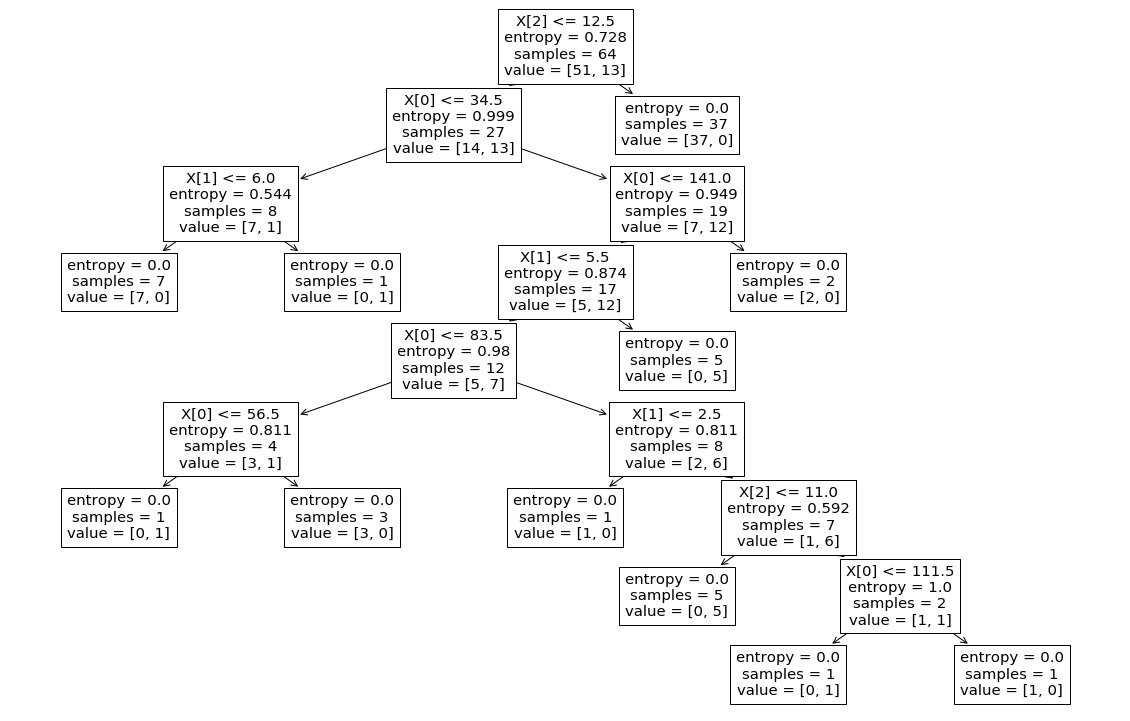

In [11]:
#Visualising the Decision tree:
import matplotlib.pyplot as plt

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
plt.figure(figsize=(20,13))
tree.plot_tree(dtree)
plt.show()

In [12]:
#KFold Cross-validation:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, X_train, y_train, cv=5)

array([0.84615385, 0.92307692, 0.84615385, 0.76923077, 0.75      ])

In [13]:
#Hyperparameter Tuning
#Grid search CV:--> to find the otimum parameters
from sklearn.tree import DecisionTreeClassifier
dtree_hype=DecisionTreeClassifier(criterion='entropy')
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(2,10),
    'min_samples_leaf':range(1,10,1)
}

In [14]:
#import the GridSearchCV pack:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=dtree_hype,param_grid=grid_param)
#applying the grid search:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
             

In [15]:
#to get the best param values:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}

In [16]:
#Build the model with these best params
final_model=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=1)
#fit the model:
final_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
#prediction on test data:
pred_test=final_model.predict(X_test)
#classification report after the best hyper model:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17

